In [2]:
%matplotlib inline
import quandl, math
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
from tsmom_model import *
import numpy as np
from datetime import datetime
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,

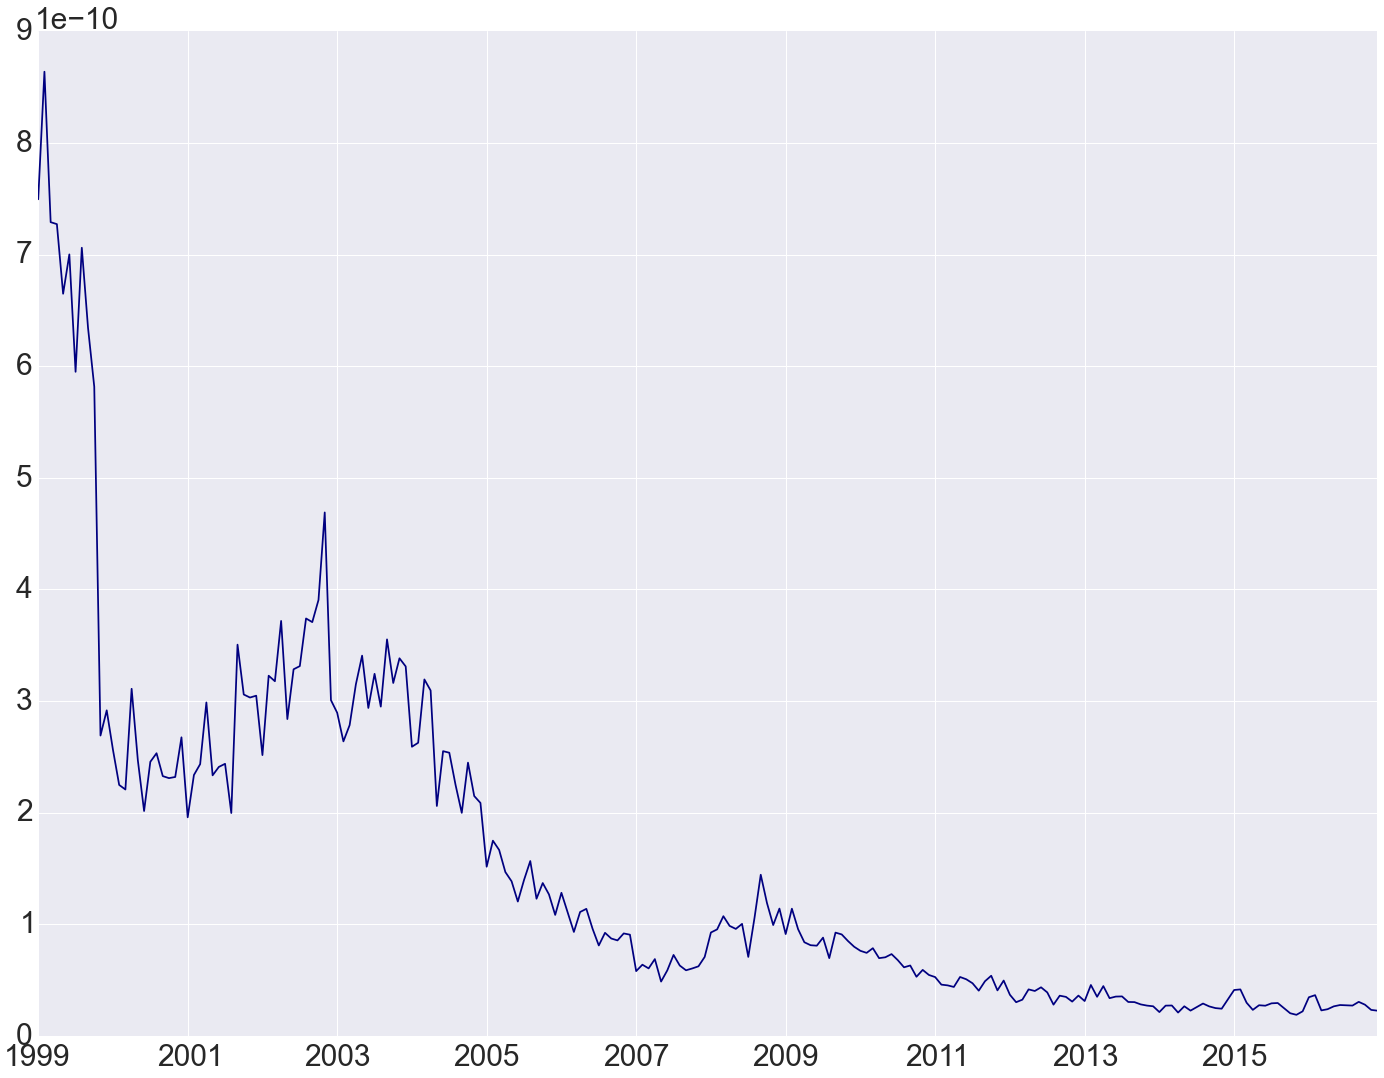

In [3]:
cleansed=load_amihud_markets_price()
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 
amihud.median(axis=1).dropna().plot(colormap='jet')

# Bank of International Settlement 
 * Turnover and Open Interest in exchange traded futures
 * Global data on all futures contracts
 * Problem this data only goes to 2012
 * Quarterly data

In [4]:
futures=pd.DataFrame()
futures['OI']=quandl.get('BIS/EXCHDERIV_0',authtoken=token)['USD Billions']
futures['Turnover']=quandl.get('BIS/EXCHDERIV_32',authtoken=token)['USD Billions']

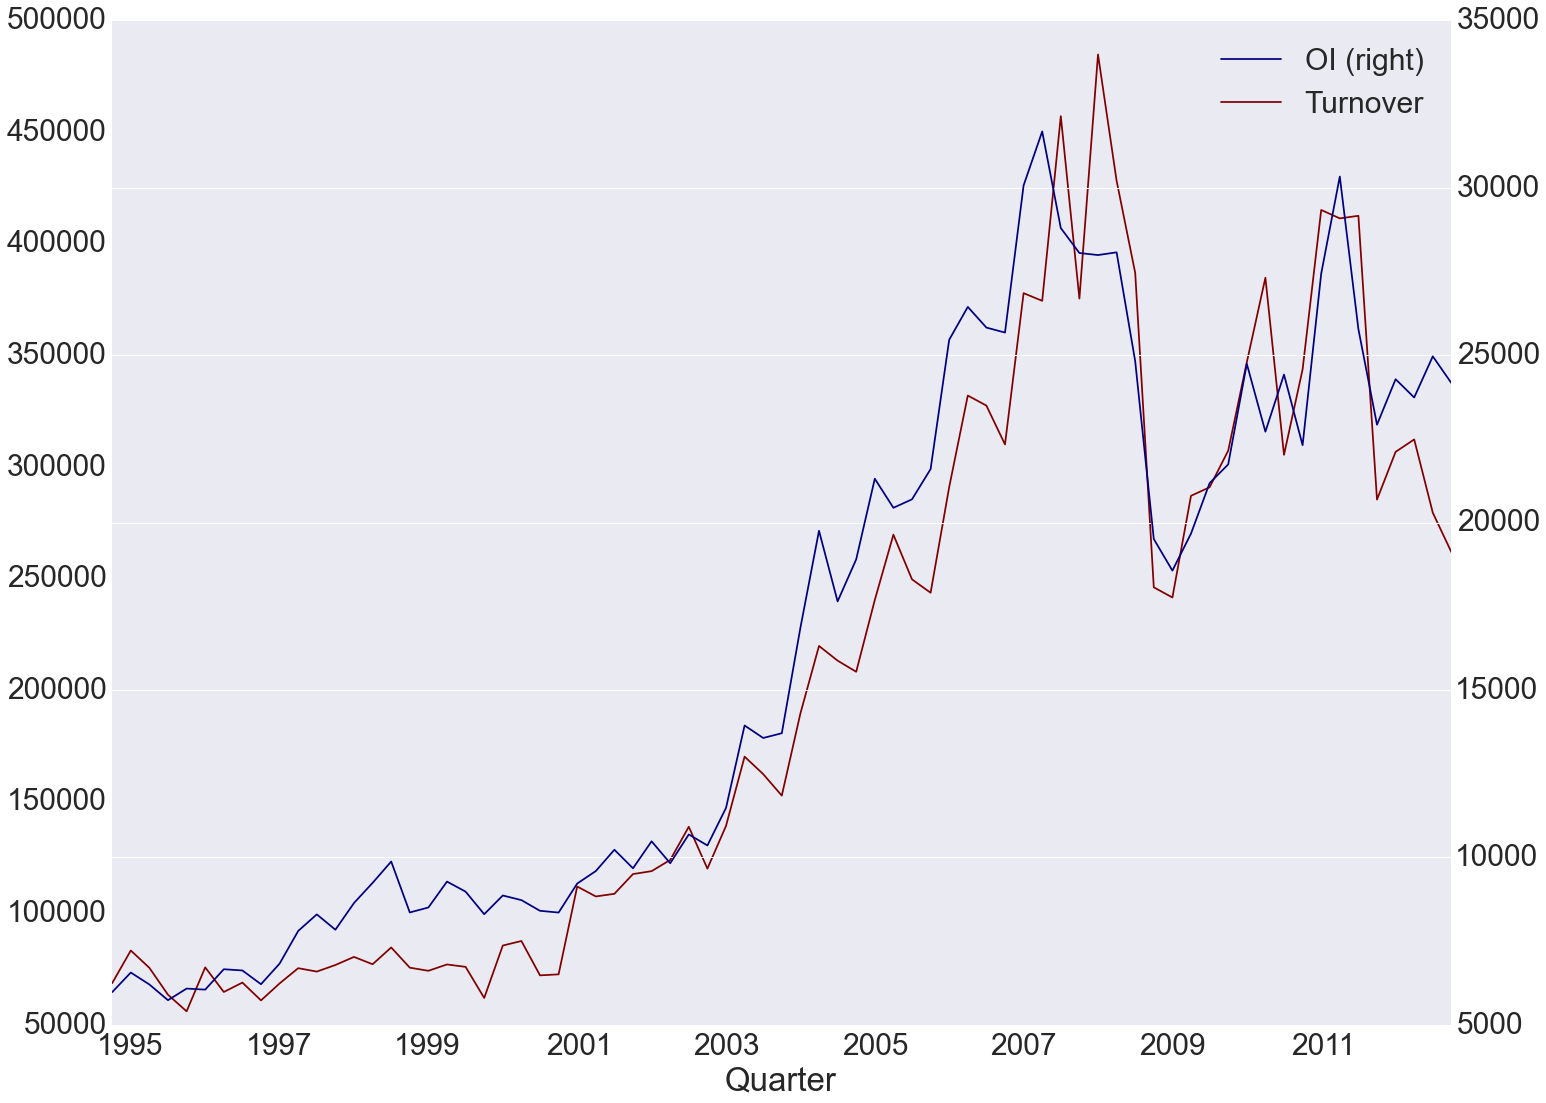

In [5]:
futures.plot(secondary_y='OI',colormap='jet')

In [6]:
mkt_liquidity=amihud.median(axis=1).dropna()
total_AUM=etf[etf_list].sum(axis=1).resample(rule='m')
ind=futures.index
ex=pd.DataFrame()
ex['Amihud']=mkt_liquidity[ind]
ex['OI']=futures.OI
ex['Turnover']=futures.Turnover
ex['Intercept']=1
ex=ex.dropna()
res1=sm.OLS(ex.Amihud,ex[['Intercept','OI']]).fit()
print res1.summary()

NameError: name 'etf' is not defined

In [7]:
res2=sm.OLS(ex.Amihud,ex[['Intercept','Turnover']]).fit()
print res2.summary()

NameError: name 'ex' is not defined

In [8]:
tab=pd.DataFrame()
for c in ['OI','Turnover']:
    res=sm.OLS(ex.Amihud,ex[['Intercept',c]]).fit()
    s=pd.Series()
    s['Intercept']=res.params.Intercept*1e10
    s['Intercept T']=res.tvalues.Intercept
    s['Arg']=res.params[c]*1e10
    s['T']=res.tvalues[c]
    s['R^2']=res.rsquared_adj
    tab[c]=s   

NameError: name 'ex' is not defined

In [9]:
tab

""


In [10]:
print tab.to_latex()

\begin{tabular}{l}
\toprule
Empty DataFrame
Columns: Index([], dtype='object')
Index: Index([], dtype='object') \\
\bottomrule
\end{tabular}



# Largest ETF data for Commodity 
 * Source: CRSP
 * Using the largest ETN funds that trade commodity futures to determine the rough size of the industry and see if the AUM in these ETF drive the liquidity in the market
 * Somthing is wrong with OIL and DJP

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:7: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


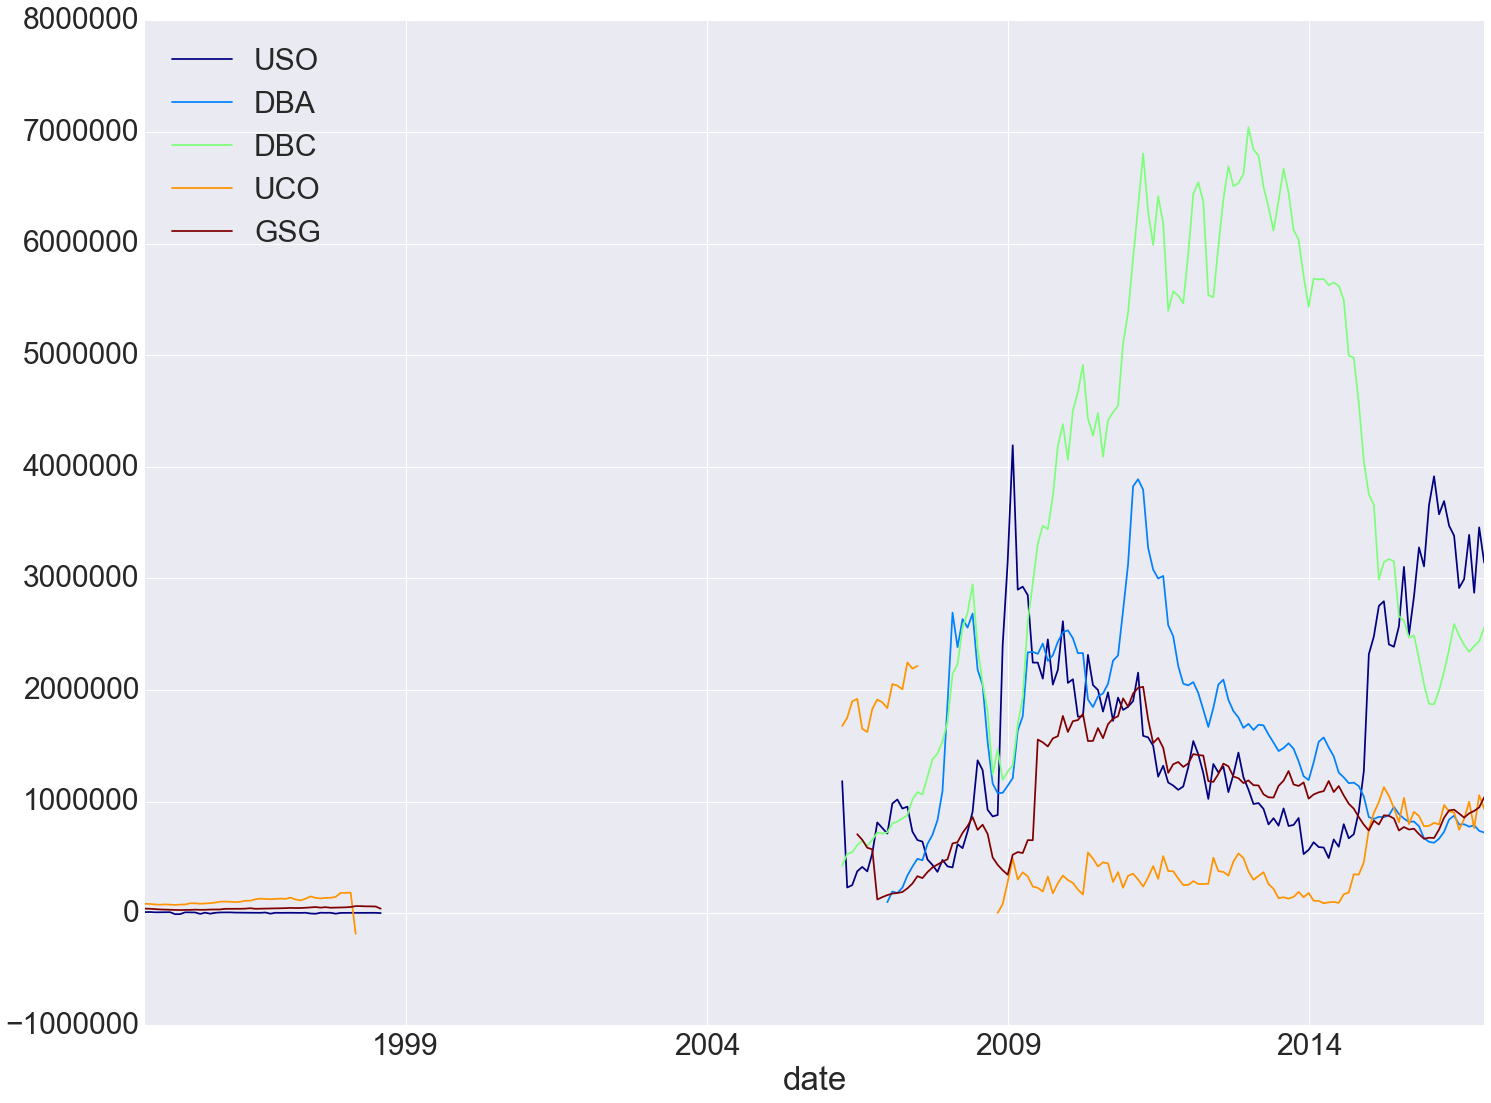

In [11]:
data=pd.read_csv('ETF_Price.csv',parse_dates=['date'])
etf_list=['USO','DBA','DBC','UCO','GSG']
etf=pd.DataFrame()
for e in etf_list:
    x=data[data.TICKER==e].set_index('date')
    etf[e]=x.PRC * x.SHROUT
etf.resample(rule='m').plot(colormap='jet')

In [12]:
mkt_liquidity=amihud.median(axis=1).dropna()
total_AUM=etf[etf_list].sum(axis=1).resample(rule='m')
ind=total_AUM[:'2016'].index
ex=pd.DataFrame()
ex['Amihud']=mkt_liquidity[ind]
ex['ETF AUM']=total_AUM[:'2016']
ex['Intercept']=1
res=sm.OLS(ex.Amihud,ex[['Intercept','ETF AUM']]).fit()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  app.launch_new_instance()
/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:6: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  if __name__ == '__main__':


/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


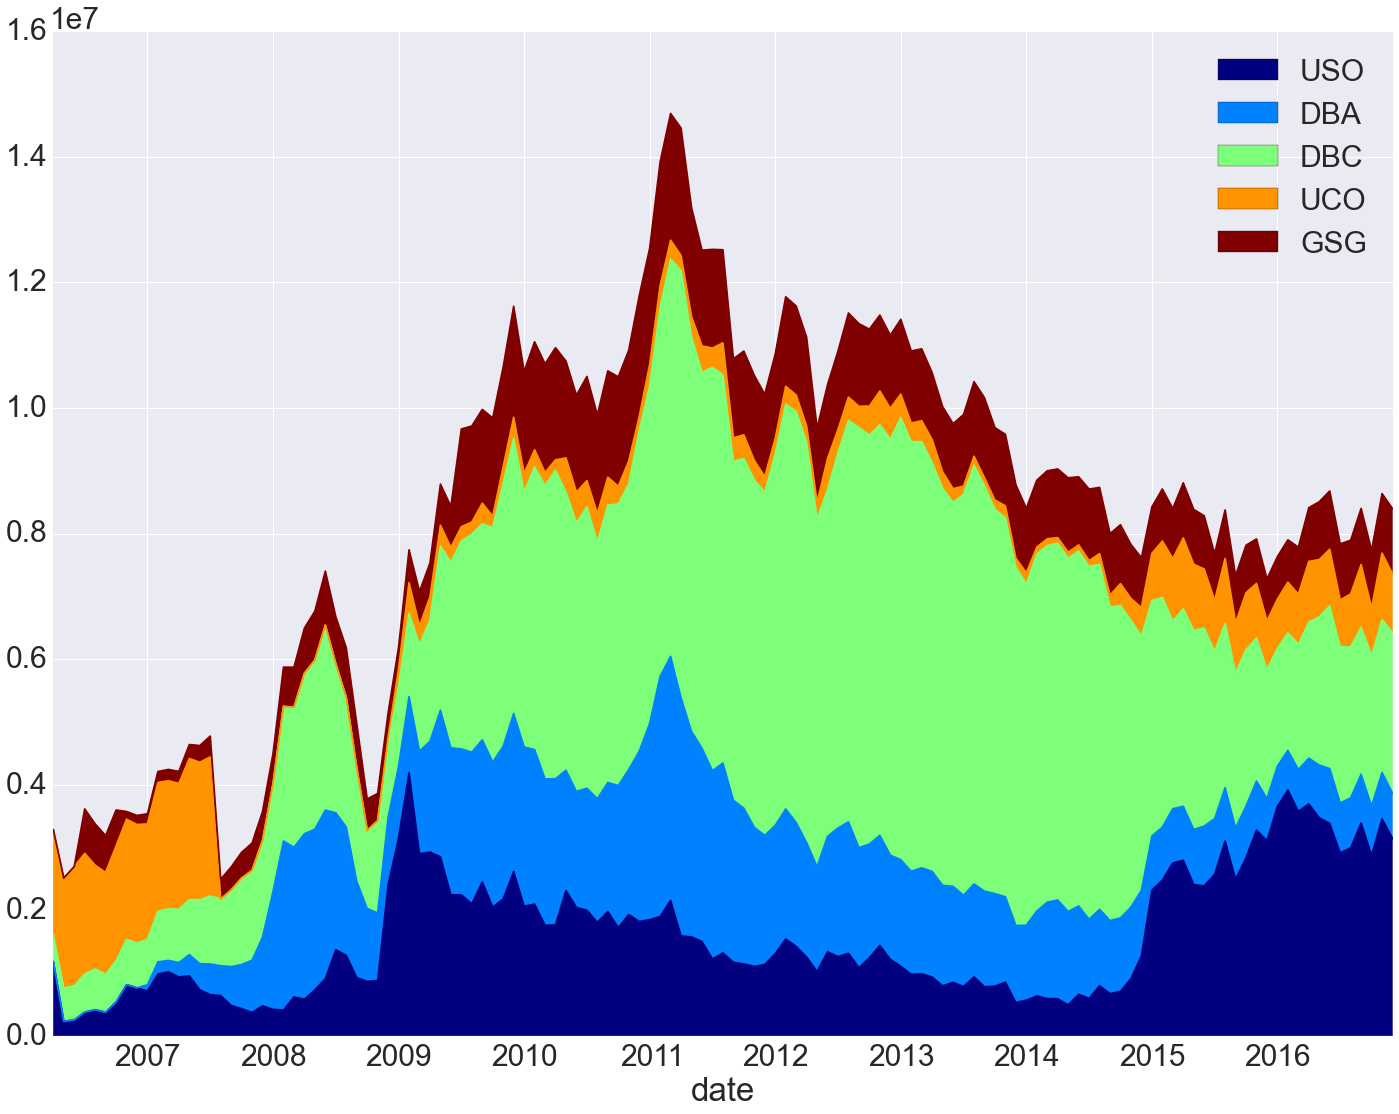

In [13]:
etf['2000':].dropna(how='all').resample(rule='m').plot(colormap='jet',kind='area',stacked=True)

In [14]:
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                 Amihud   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 31 Jul 2017   Prob (F-statistic):                nan
Time:                        19:51:51   Log-Likelihood:                    nan
No. Observations:                 268   AIC:                               nan
Df Residuals:                     268   BIC:                               nan
Df Model:                          -1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept         nan        nan        nan        n

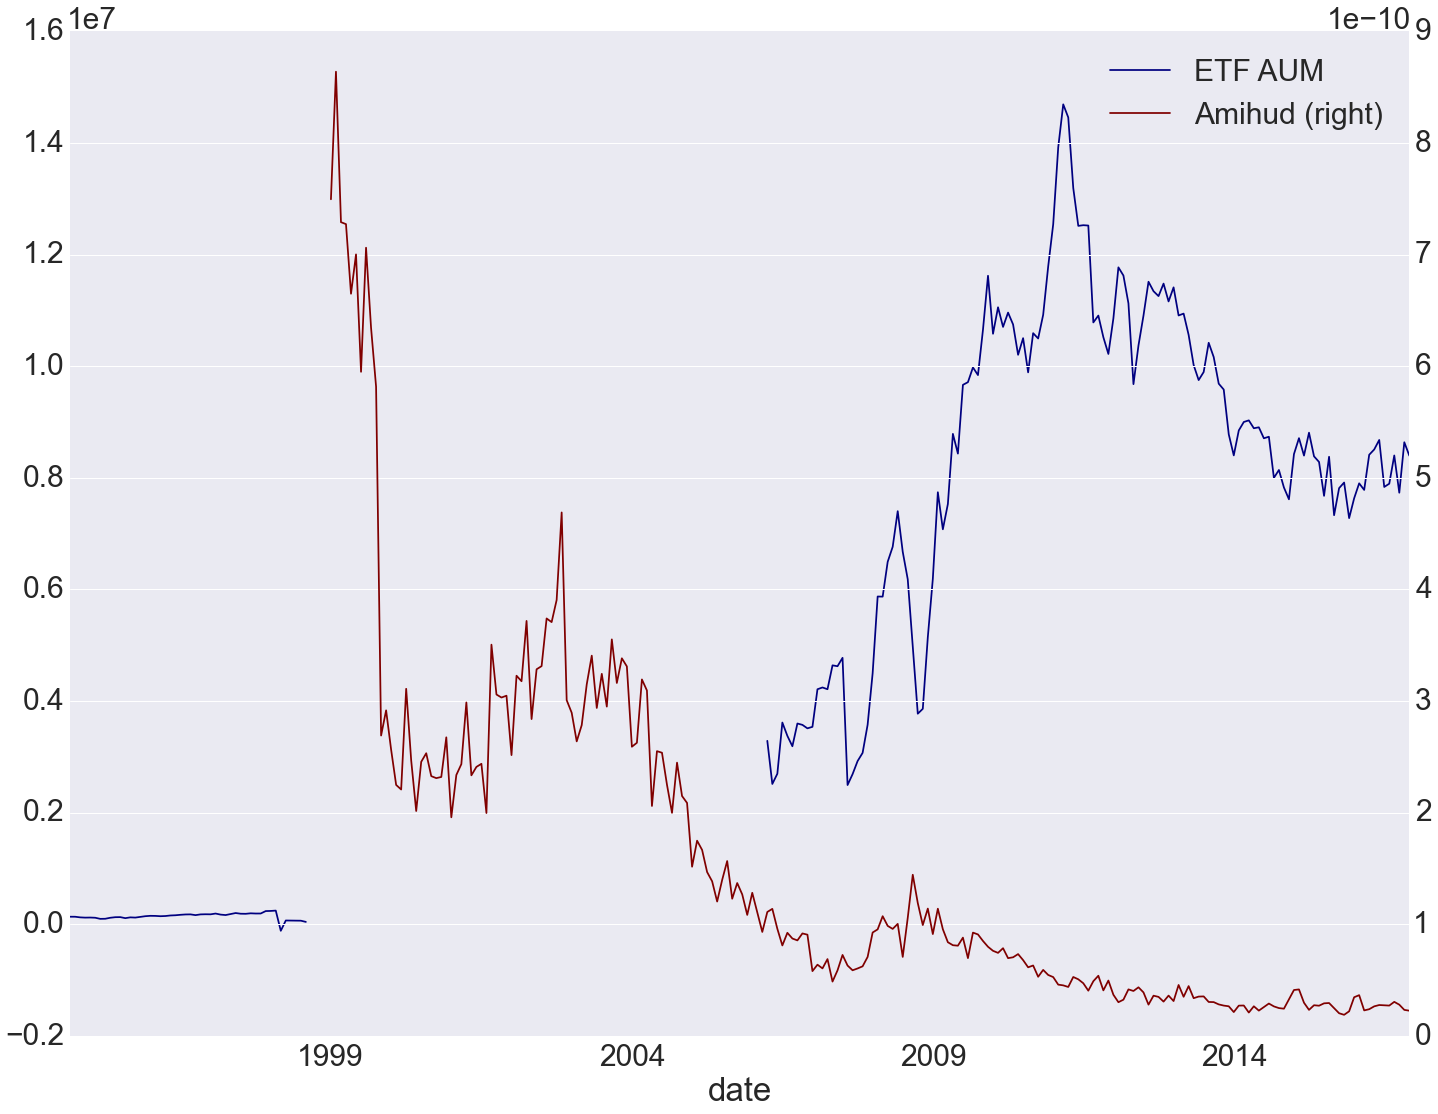

In [15]:
ex[['ETF AUM','Amihud']].plot(secondary_y='Amihud',colormap='jet')

#Hedge Fund Index
    Credit Suisse Alt Beta indices

In [16]:
cs_data=pd.read_csv('CS_AltBeta.csv',parse_dates=['Date'],index_col=[0])

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


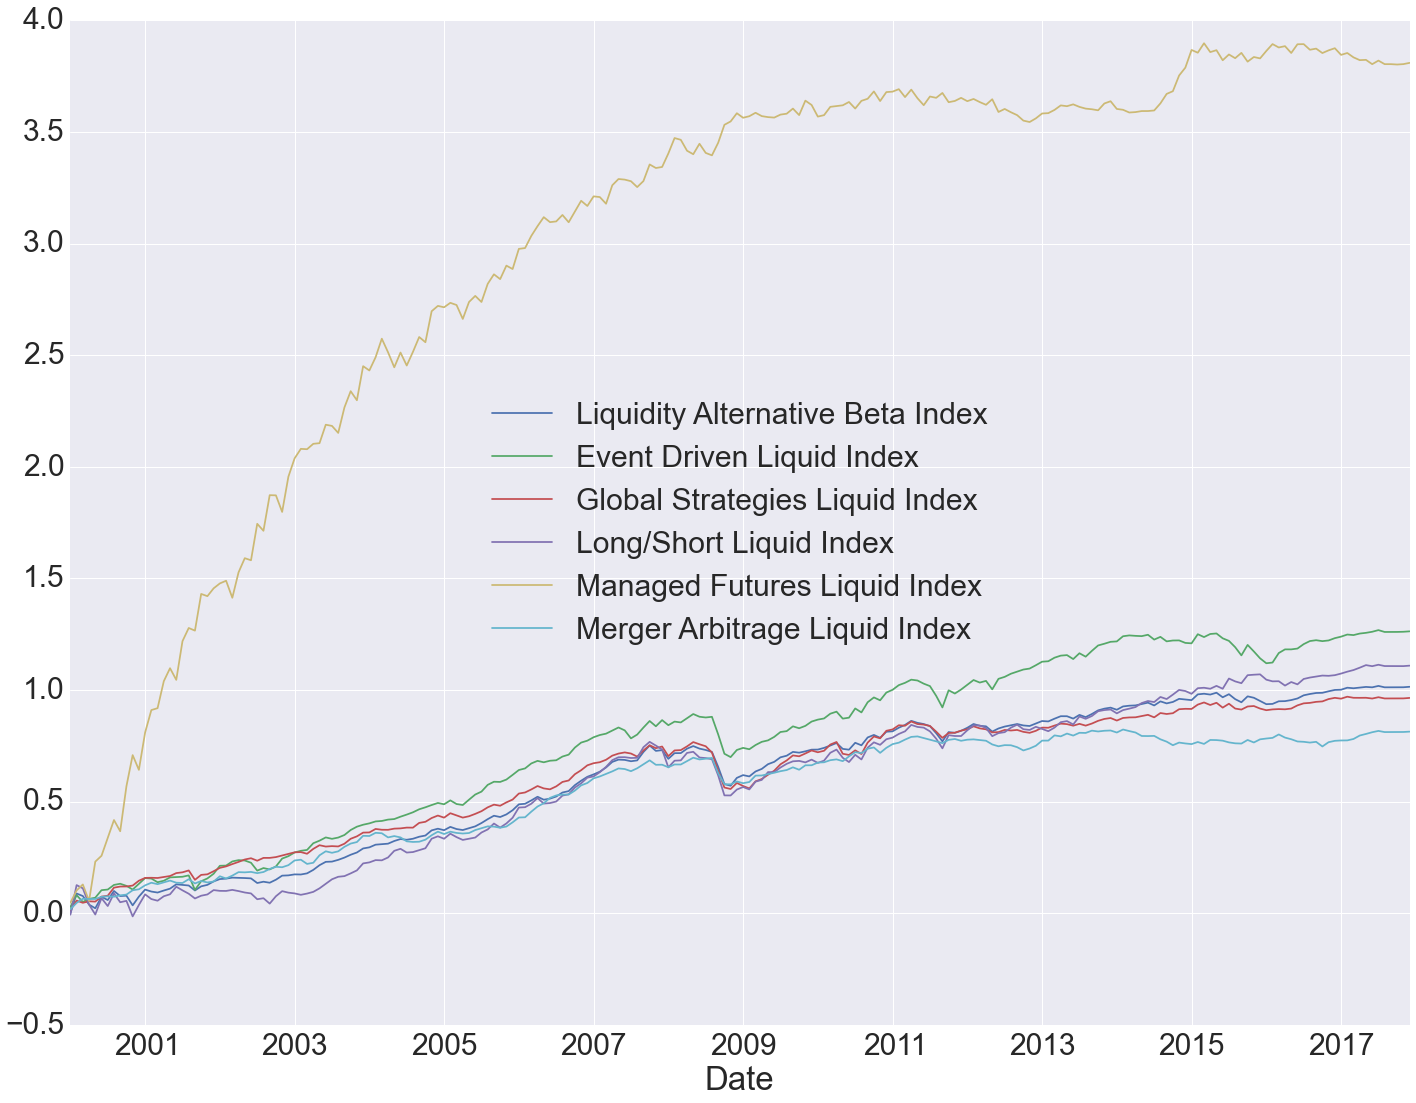

In [17]:
cs_data['2000':].dropna().cumsum().resample(rule='m',how='last').plot()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


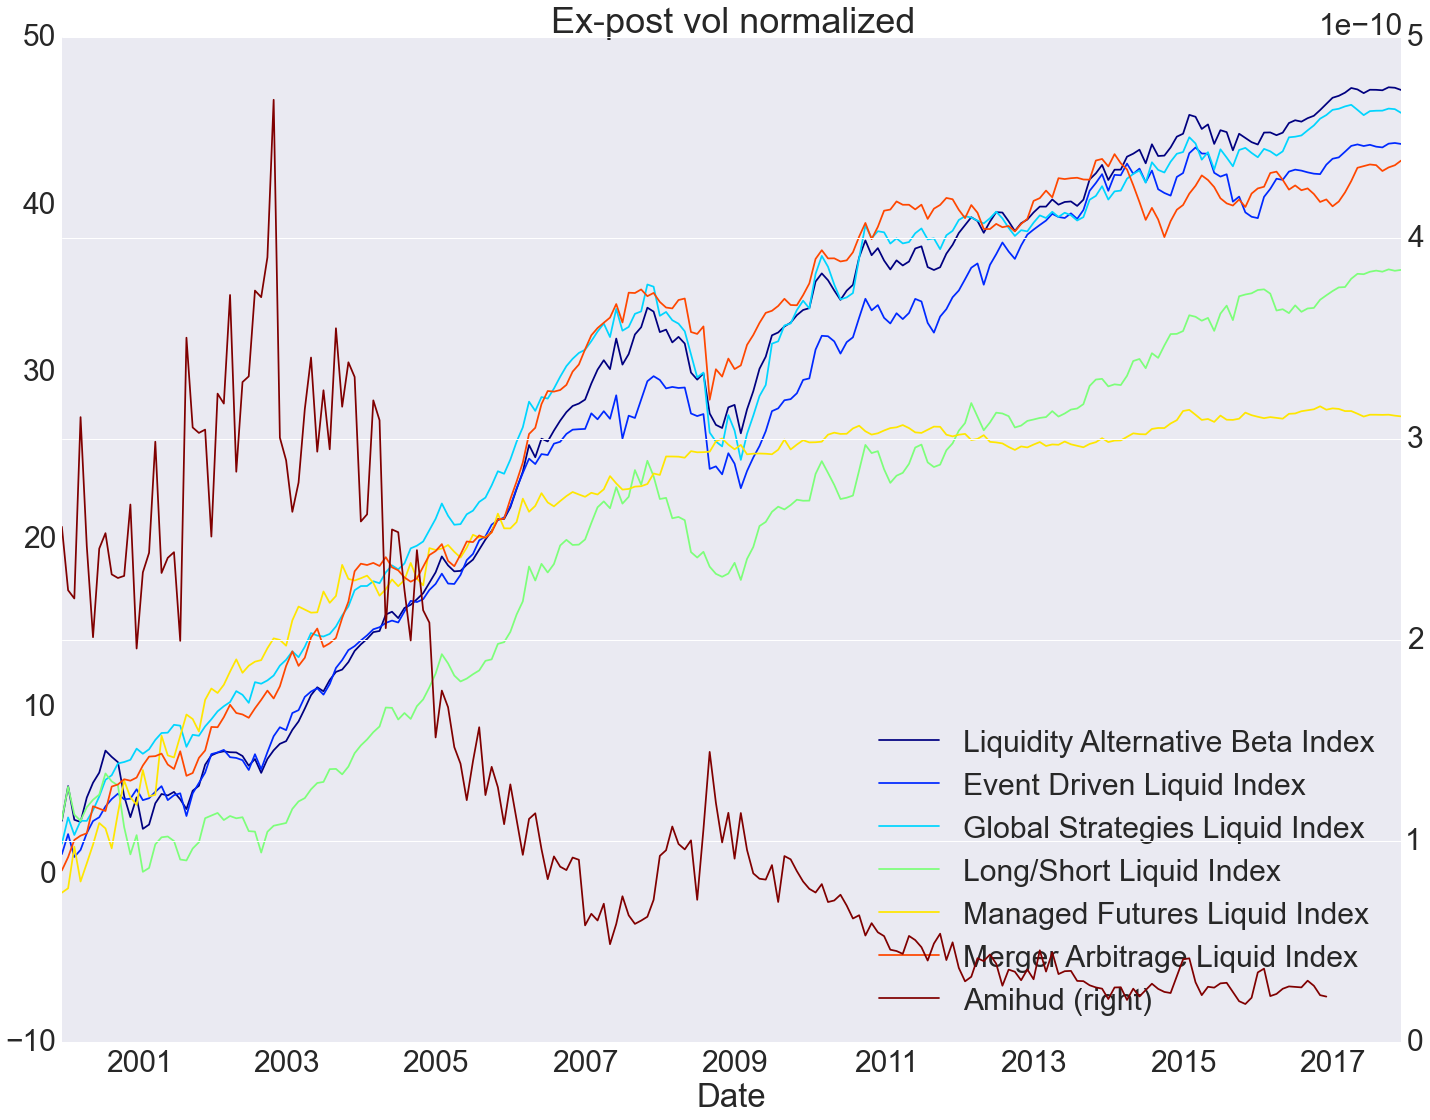

In [21]:
cs_month=cs_data.dropna().resample(rule='m',how='sum')
x=(cs_month/cs_month.diff().std()).cumsum()
x['Amihud']=amihud.median(axis=1).dropna()
x.plot(title='Ex-post vol normalized',secondary_y='Amihud',colormap='jet')

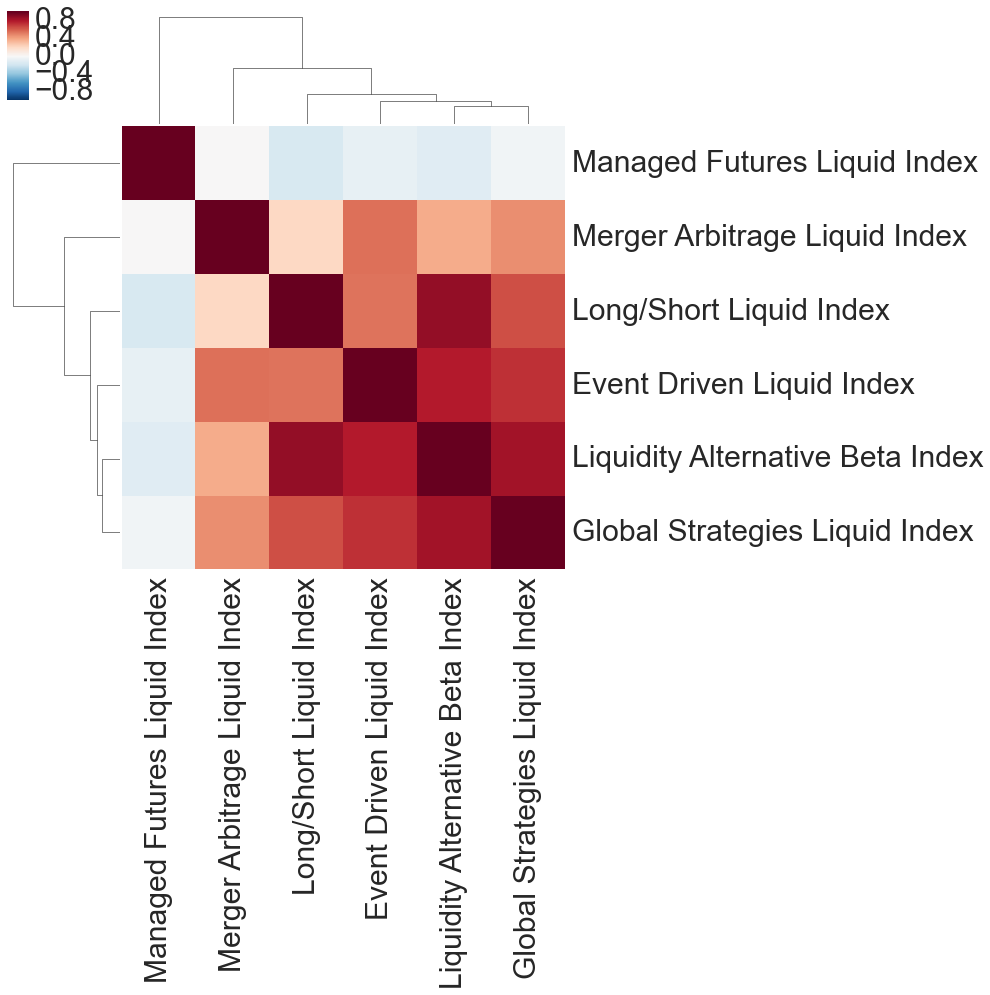

In [37]:
sns.clustermap(cs_month.diff().corr())

In [38]:
cs_month=cs_data.dropna().cumsum().resample(rule='m',how='last')

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


In [39]:
mkt_liquidity=amihud.median(axis=1).dropna()
ind_res2 = pd.DataFrame()
for c in cs_month.columns:
    s=pd.Series()
    ind=cs_month[c].dropna()['2000':'2016'].index
    ex=pd.DataFrame()
    ex['Amihud']=mkt_liquidity[ind]
    ex['Intercept']=1
    res=sm.OLS(cs_month[c].dropna()[ind],ex).fit()
    s['Intercept']=res.params.Intercept
    s['Intercept Tstat']=res.tvalues.Intercept
    s['Amihud (x1e-9)']=res.params.Amihud/1e9
    s['Amihud Tstat']=res.tvalues.Amihud
    s['Adj R^2']=res.rsquared_adj
    ind_res2[c]=s

In [40]:
ind_res2.round(2)

,Liquidity Alternative Beta Index,Event Driven Liquid Index,Global Strategies Liquid Index,Long/Short Liquid Index,Managed Futures Liquid Index,Merger Arbitrage Liquid Index
Intercept,0.92,1.15,0.89,0.94,3.92,0.81
Intercept Tstat,70.26,68.00,71.94,66.95,62.83,71.13
Amihud (x1e-9),-2.61,-3.16,-2.27,-2.86,-7.68,-2.08
Amihud Tstat,-33.21,-31.27,-30.63,-34.18,-20.63,-30.76
Adj R^2,0.84,0.83,0.82,0.85,0.68,0.82


In [41]:
print ind_res2.round(2).to_latex()

\begin{tabular}{lrrrrrr}
\toprule
{} &  Liquidity Alternative Beta Index &  Event Driven Liquid Index &  Global Strategies Liquid Index &  Long/Short Liquid Index &  Managed Futures Liquid Index &  Merger Arbitrage Liquid Index \\
\midrule
Intercept       &                              0.92 &                       1.15 &                            0.89 &                     0.94 &                          3.92 &                           0.81 \\
Intercept Tstat &                             70.26 &                      68.00 &                           71.94 &                    66.95 &                         62.83 &                          71.13 \\
Amihud (x1e-9)  &                             -2.61 &                      -3.16 &                           -2.27 &                    -2.86 &                         -7.68 &                          -2.08 \\
Amihud Tstat    &                            -33.21 &                     -31.27 &                          -30.63 &              

#Hedge Fund Index
* Can Amihud explain HF performance.  For example does increased liquidity reduce the amount of returns in hedge funds


In [22]:
mkt={
    'Eurekahedge Multi–Factor Risk Premia Index':'EUREKA/MEI27',
    'Eurekahedge CTA/Managed Futures Hedge Fund Index':'EUREKA/476',
    'Eurekahedge Macro Hedge Fund Index':'EUREKA/481',
    'Eurekahedge Trend Following Index':'EUREKA/647',
    'Eurekahedge Commodity Hedge Fund Index':'EUREKA/650'
}
index=pd.DataFrame()
for k,tick in mkt.items():
    index[k]=quandl.get(tick,authtoken=token).Returns

/Users/mrefermat/.local/lib/python2.7/site-packages/dateutil/parser.py:98: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  while nextchar == '\x00':
/Users/mrefermat/.local/lib/python2.7/site-packages/dateutil/parser.py:123: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  elif nextchar == '.':


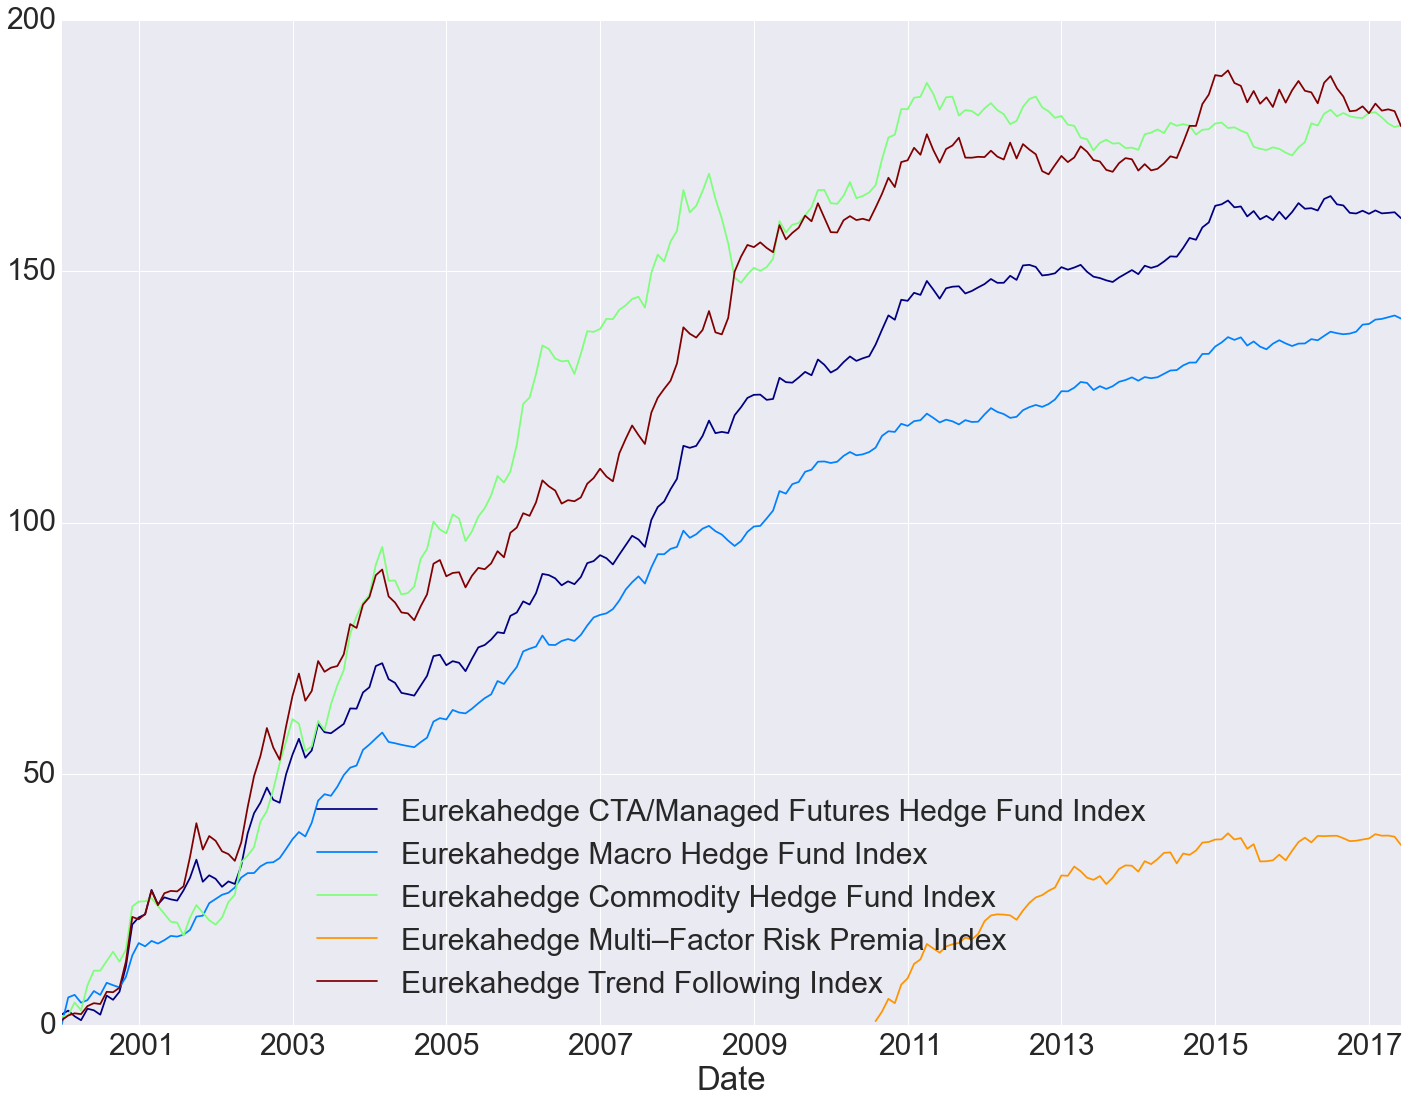

In [23]:
index.cumsum().plot(colormap='jet')

In [24]:
mkt_liquidity=amihud.median(axis=1).dropna()
ind_res = pd.DataFrame()
for c in index.columns:
    s=pd.Series()
    ind=index[c].dropna()[:'2016'].index
    ex=pd.DataFrame()
    ex['Amihud']=mkt_liquidity[ind]
    ex['Intercept']=1
    res=sm.OLS(index[c].dropna()[ind],ex).fit()
    s['Intercept']=res.params.Intercept
    s['Intercept Tstat']=res.tvalues.Intercept
    s['Amihud/1e9']=res.params.Amihud/1e9
    s['Amihud Tstat']=res.tvalues.Amihud
    s['Adj R^2']=res.rsquared_adj
    ind_res[c]=s

In [25]:
ind_res.round(2)

,Eurekahedge CTA/Managed Futures Hedge Fund Index,Eurekahedge Macro Hedge Fund Index,Eurekahedge Commodity Hedge Fund Index,Eurekahedge Multi–Factor Risk Premia Index,Eurekahedge Trend Following Index
Intercept,0.44,0.40,0.12,-0.46,0.34
Intercept Tstat,2.12,3.26,0.44,-0.94,1.18
Amihud/1e9,2.78,2.21,5.98,26.99,4.34
Amihud Tstat,2.24,2.99,3.52,2.02,2.48
Adj R^2,0.02,0.04,0.05,0.04,0.02


In [33]:
FH_Trend=pd.read_csv('FH_Trend.csv',parse_dates=['Date'],index_col=0)
ind_res = pd.DataFrame()
ex=ex.join(FH_Trend)
for c in index.columns:
    s=pd.Series()
    ind=index[c].dropna()[:'2016'].index
    res=sm.OLS(index[c].dropna()[ind],ex.ix[ind]).fit()
    s['Intercept']=res.params.Intercept
    s['Intercept Tstat']=res.tvalues.Intercept
    s['Amihud/1e9']=res.params.Amihud/1e9
    s['Amihud Tstat']=res.tvalues.Amihud
    s['Adj R^2']=res.rsquared_adj
    ind_res[c]=s

In [34]:
ind_res.round(2)

,Eurekahedge CTA/Managed Futures Hedge Fund Index,Eurekahedge Macro Hedge Fund Index,Eurekahedge Commodity Hedge Fund Index,Eurekahedge Multi–Factor Risk Premia Index,Eurekahedge Trend Following Index
Intercept,0.54,0.36,-0.04,-0.63,0.61
Intercept Tstat,2.78,2.94,-0.14,-1.29,2.36
Amihud/1e9,2.37,2.21,6.52,33.70,3.84
Amihud Tstat,2.08,3.02,3.91,2.59,2.49
Adj R^2,0.20,0.08,0.11,0.16,0.26


In [36]:
print ind_res.round(2).to_latex()

\begin{tabular}{lrrrrr}
\toprule
{} &  Eurekahedge CTA/Managed Futures Hedge Fund Index &  Eurekahedge Macro Hedge Fund Index &  Eurekahedge Commodity Hedge Fund Index &  Eurekahedge Multi–Factor Risk Premia Index &  Eurekahedge Trend Following Index \\
\midrule
Intercept       &                                              0.54 &                                0.36 &                                   -0.04 &                                       -0.63 &                               0.61 \\
Intercept Tstat &                                              2.78 &                                2.94 &                                   -0.14 &                                       -1.29 &                               2.36 \\
Amihud/1e9      &                                              2.37 &                                2.21 &                                    6.52 &                                       33.70 &                               3.84 \\
Amihud Tstat    &                  

# Including Fung and Hsieh HF factors
I want to understand residual alpha 

In [27]:
Factors=pd.read_csv('FH_Trend.csv',parse_dates=['Date'],index_col=0)
Factors['US10Y']=quandl.get('FED/RIFLGFCY10_N_M',authtoken=token).Value/100.

In [28]:
FF5=quandl.get('KFRENCH/FACTORS5_M',authtoken=token)

#Hedge Fund AUM
* Does increase in Hedge Fund AUM describe the rise of liquidity

Problems:
* We don't have great proxies for HFT shops

# US 40 Act funds using CRSP Mutual Fund Database
* Can we use AUM of the funds to describe the increase in market liquidity
* Amihud and performance?  However, how far back does the 40 ACt fund goes

In [170]:
MF_data=pd.read_csv('MutualFund.csv',parse_dates=['caldt'])

In [171]:
MF_data.columns

Index([u'summary_period2', u'crsp_fundno', u'caldt', u'nav_latest',
       u'nav_latest_dt', u'tna_latest', u'tna_latest_dt', u'yield', u'div_ytd',
       u'cap_gains_ytd', u'unrealized_app_dep', u'unrealized_app_dt',
       u'per_com', u'per_pref', u'per_conv', u'per_corp', u'per_muni',
       u'per_govt', u'per_oth', u'per_cash', u'per_bond', u'per_abs',
       u'per_mbs', u'maturity', u'crsp_cl_grp', u'fund_name', u'nasdaq',
       u'mgmt_name', u'mgr_name', u'inst_fund', u'index_fund_flag', u'et_flag',
       u'exp_ratio', u'mgmt_fee', u'turn_ratio', u'fiscal_yearend', u'policy',
       u'lipper_class', u'lipper_class_name', u'lipper_asset_cd'],
      dtype='object')

In [300]:
MF_data[MF_data.nasdaq=='AQMIX'].T

,473684,473685,473686,473687,473688,473689,473690
summary_period2,AQ,AQ,AQ,AQ,AQ,AQ,AQ
crsp_fundno,48695,48695,48695,48695,48695,48695,48695
caldt,2010-12-31 00:00:00,2011-12-30 00:00:00,2012-12-31 00:00:00,2013-12-31 00:00:00,2014-12-31 00:00:00,2015-12-31 00:00:00,2016-12-30 00:00:00
nav_latest,10.3,9.57,9.78,10.59,10.63,10.18,9.32
nav_latest_dt,31/12/10,30/12/11,31/12/12,31/12/13,31/12/14,31/12/15,30/12/16
tna_latest,655.4,1081.1,2129.7,4497.2,5620.1,7777.1,7666
tna_latest_dt,31/12/10,30/12/11,31/12/12,31/12/13,31/12/14,31/12/15,30/12/16
yield,0.00850485,0.00401254,0.00764417,NaN,0.0449247,0.0448625,0.000175215
div_ytd,0.0876,0.0384,0.07476,NaN,0.47755,0.4567,0.001633
cap_gains_ytd,0.1496,0.0363,NaN,0.10739,0.49011,0.20628,NaN


/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()


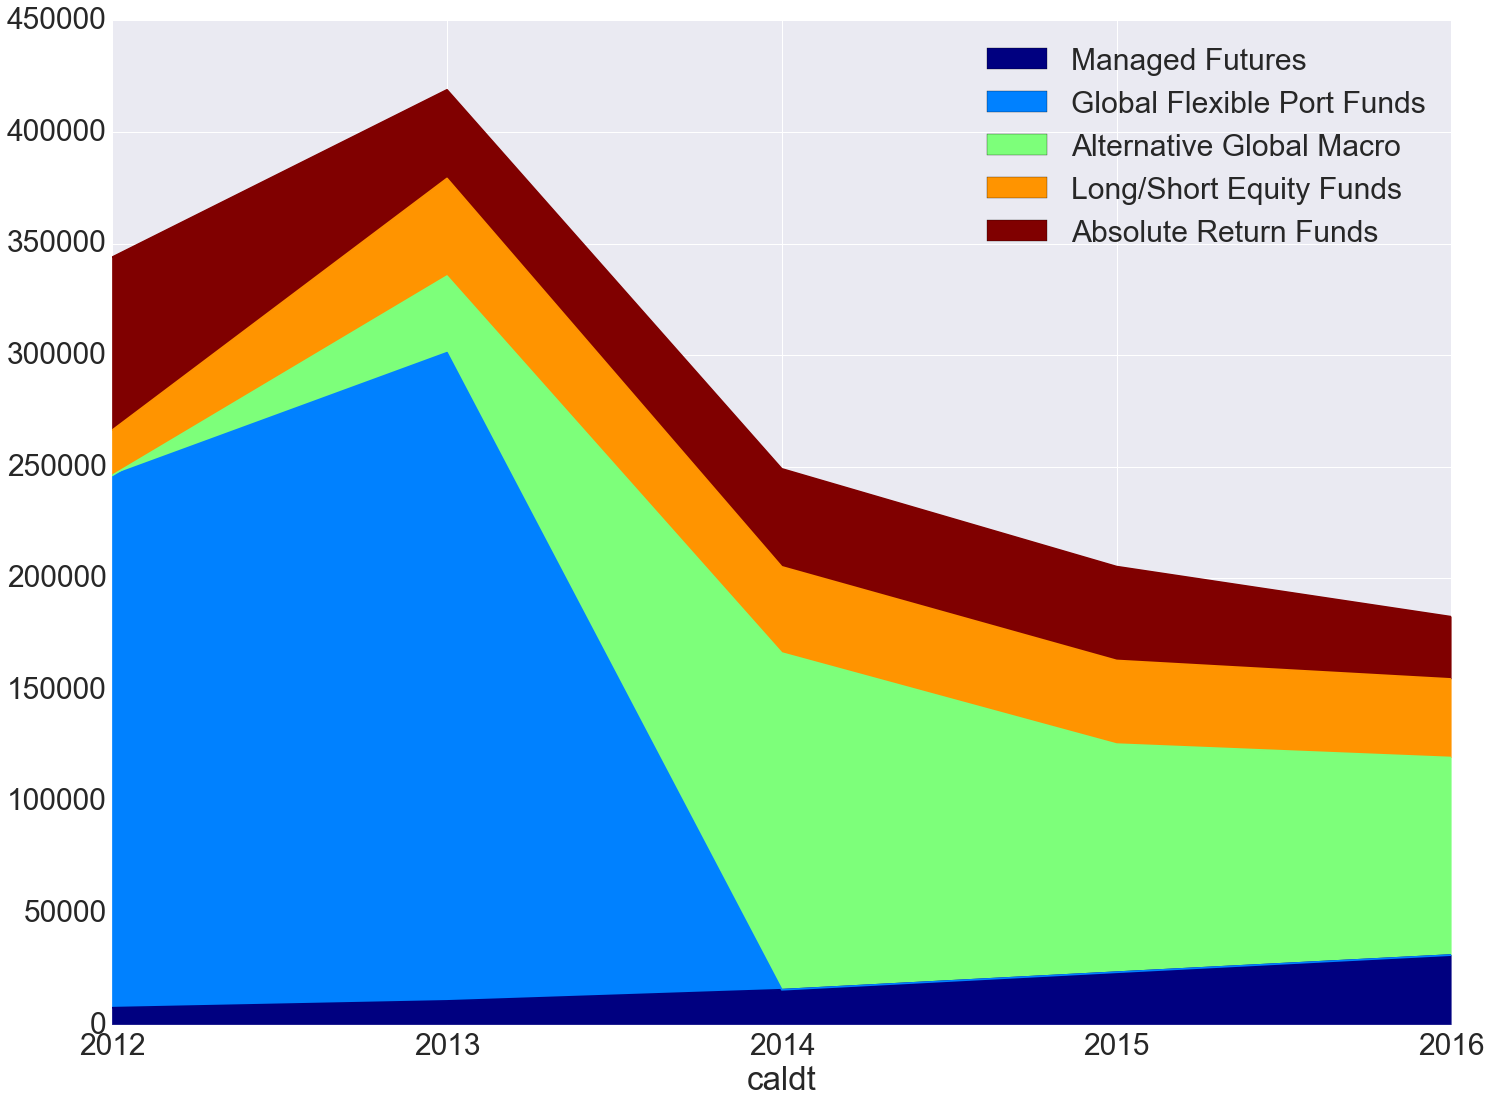

In [240]:
types={'Long/Short Equity Funds':'LSE',
       'Managed Futures':'MFF',
       'Absolute Return Funds':'ABR',
       'Alternative Global Macro':'AGM',
       'Global Flexible Port Funds':'GX'}
asset_alt=pd.DataFrame()
for k,tick in types.items():
    asset_alt[k]=MF_data[MF_data.lipper_class==tick].set_index('caldt').tna_latest.dropna(how='all').astype('float').resample(rule='m',how='sum').dropna()
asset_alt.plot(kind='area',colormap='jet',stacked=True)

In [307]:
x=MF_data[MF_data.lipper_class=='MFF']
no=x.crsp_fundno.unique()

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  if __name__ == '__main__':


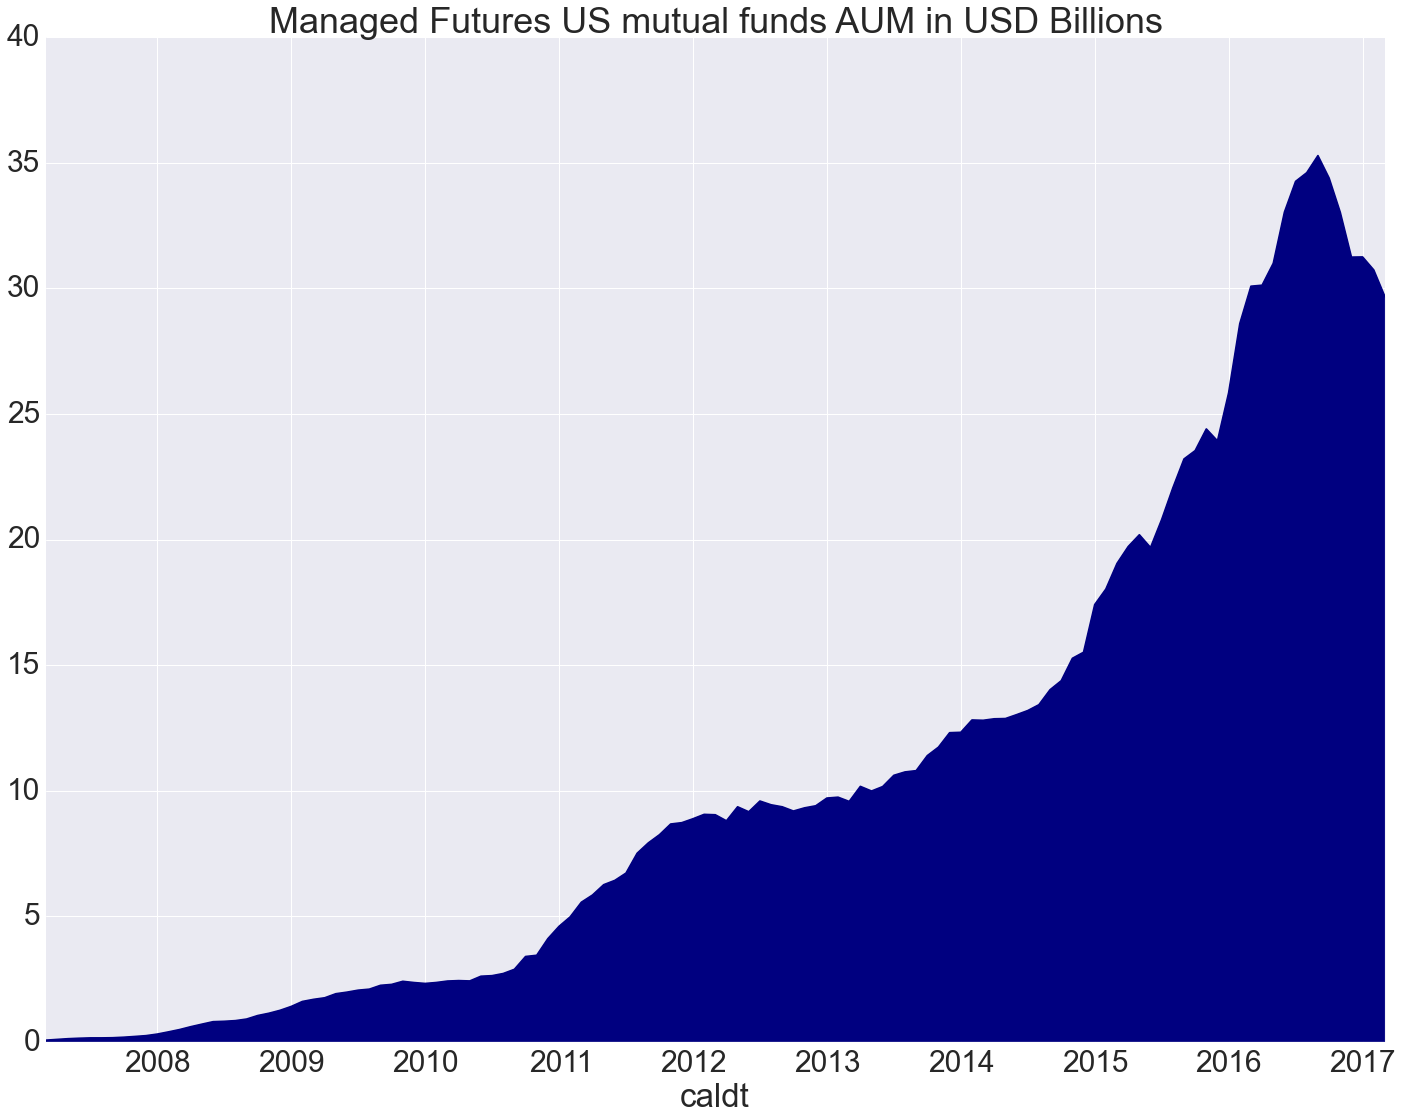

In [333]:
x=pd.read_csv('MF_Funds.csv',parse_dates=['caldt']).set_index('caldt').mtna.resample(rule='m',how='sum')
(x/1000).plot(kind='area',colormap='jet',title='Managed Futures US mutual funds AUM in USD Billions')